In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Load Dataset

In [25]:
data=pd.read_csv('./HungarianChickenPox/hungary_chickenpox.csv')

In [4]:
week_total=data.sum(1)

In [5]:
data_county=pd.read_csv('./HungarianChickenPox/hungary_county_edges.csv')

In [6]:
data_county

,name_1,name_2,id_1,id_2
0,BACS,JASZ,0,10
1,BACS,BACS,0,0
2,BACS,BARANYA,0,1
3,BACS,CSONGRAD,0,5
4,BACS,PEST,0,13
...,...,...,...,...
97,VESZPREM,SOMOGY,18,14
98,ZALA,VAS,19,17
99,ZALA,ZALA,19,19
100,ZALA,SOMOGY,19,14


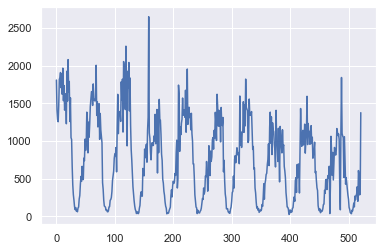

In [7]:
week_total.plot()
plt.show()

# Predict week total

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor

In [10]:
data_ml=pd.concat([week_total[:-1].reset_index(drop=True),week_total[1:].reset_index(drop=True)],axis=1).rename(columns={0:'x',1:'y'})

In [11]:
data_ml

,x,y
0,1807,1407
1,1407,1284
2,1284,1255
3,1255,1478
4,1478,1816
...,...,...
516,201,608
517,608,536
518,536,286
519,286,299


In [12]:
l=int(data_ml.shape[0]*0.8)
xtrain=data_ml['x'][:l]
ytrain=data_ml['y'][:l]

xtest=data_ml['x'][l:]
ytest=data_ml['y'][l:]

In [15]:
ada=AdaBoostRegressor(n_estimators=100)

In [16]:
ada.fit(xtrain.values.reshape(-1,1),ytrain)

AdaBoostRegressor(n_estimators=100)

In [17]:
ada.score(xtest.values.reshape(-1,1),ytest)

0.5196593176401699

In [18]:
ypred=ada.predict(xtest.values.reshape(-1,1))

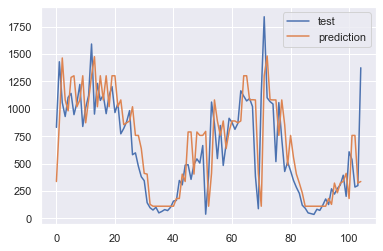

In [23]:
plt.plot(ytest.values)
plt.plot(ypred)
plt.legend(['test','prediction'])
plt.show()

# City level

In [29]:
data.head()

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60


In [59]:
data_ml=data['BARANYA'][:-1]
y_budapest=data['BARANYA'][1:]

In [54]:
data_ml.drop('Date',1,inplace=True)

/Users/JoaoGomes/anaconda3/envs/python3.8/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
l=int(data_ml.shape[0]*0.8)
xtrain=data_ml[:l]
ytrain=y_budapest[:l]

xtest=data_ml[l:]
ytest=y_budapest[l:]

In [61]:
ada=AdaBoostRegressor(n_estimators=200)

In [64]:
ada.fit(xtrain.values.reshape(-1,1),ytrain)

AdaBoostRegressor(n_estimators=200)

In [65]:
ypred=ada.predict(xtest.values.reshape(-1,1))

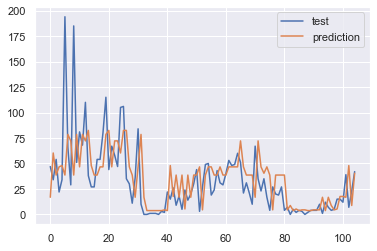

In [66]:
plt.plot(ytest.values)
plt.plot(ypred)
plt.legend(['test','prediction'])
plt.show()

In [49]:
ada.feature_importances_

array([0.10899236, 0.02360413, 0.0401174 , 0.0244085 , 0.00746292,
       0.03839619, 0.05460145, 0.10258026, 0.05689763, 0.00834199,
       0.02559358, 0.08981375, 0.05400125, 0.14865419, 0.03562185,
       0.03990991, 0.02589668, 0.05580958, 0.02676783, 0.03252855])